In [5]:
from figure1 import extract_slha
from figure1 import slha_folder
from figure1 import plot
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = pd.DataFrame(extract_slha('M2from0to1200M15000mu1000and5000'))

In [69]:
df.head()

,M_1(MX),M_2(MX),mu(MX),Neut1,Neut2,Neut3,Char1
0,100.0,0.0,1000.0,-2.280177,99.625160,-1015.89645,1019.26650
1,100.0,0.0,5000.0,-1.181126,100.295775,-4965.04767,4966.05200
2,100.0,1000.0,1000.0,99.607223,967.753344,-1013.18875,1095.84811
3,100.0,1000.0,5000.0,100.303475,1056.256630,-4964.26583,4965.44332
4,100.0,1005.0,1000.0,99.607208,969.493024,-1013.22234,1099.17559


In [70]:
df_mu_1000 = df[df['mu(MX)'] == 1000.0].sort_values(by='M_2(MX)')
df_mu_5000 = df[df['mu(MX)'] == 5000.0].sort_values(by='M_2(MX)')

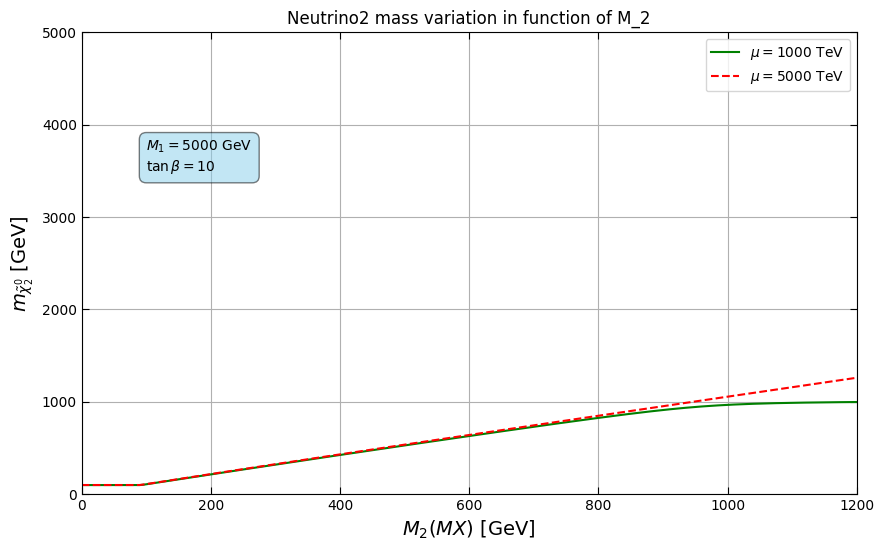

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_mu_1000['M_2(MX)'], abs(df_mu_1000['Neut2']), color = 'green', linestyle='-', label = r'$\mu = 1000$ TeV')
plt.plot(df_mu_5000['M_2(MX)'], abs(df_mu_5000['Neut2']), color = 'red', linestyle='--', label = r'$\mu = 5000$ TeV')
plt.xlabel(r'$M_2(MX)$ [GeV]', fontsize= 14)
plt.ylabel(r'$m_{\tilde{\chi}_2^0}$ [GeV]', fontsize= 14)
plt.title("Neutrino2 mass variation in function of M_2")
plt.grid()
plt.legend()
plt.xlim(0,1200)
plt.ylim(0,5000)
plt.text(100,3500,r'$M_1 = 5000$ GeV' + '\n'+r'$\tan\beta=10$', fontsize=10, bbox=dict(facecolor='skyblue', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
plt.tick_params(which='major', length=5, direction='in', bottom = True, top = True, left = True, right=True)
plt.show();

In [72]:
df_desin = slha_folder('M2from0to1200M15000mu1000and5000')

In [73]:
df_desin.head(80)

,M_1(MX),M_2(MX),mu(MX),particle_id,branching_ratio,decay_products
0,100.0,0.0,1000.0,1000037,0.307263,"(23, 1000024)"
1,100.0,0.0,1000.0,1000037,0.299816,"(24, 1000022)"
2,100.0,0.0,1000.0,1000037,0.293471,"(25, 1000024)"
3,100.0,0.0,1000.0,1000037,0.099450,"(24, 1000023)"
4,100.0,0.0,1000.0,1000023,0.498191,"(-1000024, 24)"
...,...,...,...,...,...,...
75,100.0,1000.0,1000.0,1000023,0.705821,"(25, 1000022)"
76,100.0,1000.0,1000.0,1000023,0.294179,"(23, 1000022)"
77,100.0,1000.0,1000.0,1000025,0.684509,"(23, 1000022)"
78,100.0,1000.0,1000.0,1000025,0.315016,"(25, 1000022)"


In [74]:
df_desin.to_csv("desintegration.csv")

In [75]:
# Filter the data for neutralino 2 and mu(MX) = 1000
filtered_data_1000 = df_desin[(df_desin['particle_id'] == 1000023) & (df_desin['mu(MX)'] == 1000)]

# Group by M_2(MX) and decay_products and sum the branching ratios
grouped_data_1000 = filtered_data_1000.groupby(['M_2(MX)', 'decay_products']).branching_ratio.sum().reset_index()

# Pivot the data to have decay_products as columns
pivot_data_1000 = grouped_data_1000.pivot(index='M_2(MX)', columns='decay_products', values='branching_ratio')

# Fill NaN values with 0
pivot_data_1000.fillna(0, inplace=True)

pivot_data_1000.head()

decay_products,"(-1000024, 24)","(-24, 1000024)","(-16, 16, 1000022)","(-15, 15, 1000022)","(-15, 16, 1000024)","(-14, 14, 1000022)","(-13, 13, 1000022)","(-13, 14, 1000024)","(-12, 12, 1000022)","(-11, 11, 1000022)","(-11, 12, 1000024)","(-5, 5, 1000022)","(-4, 4, 1000022)","(-3, 3, 1000022)","(-3, 4, 1000024)","(-2, 2, 1000022)","(-1, 1, 1000022)","(-1, 2, 1000024)","(23, 1000022)","(25, 1000022)"
M_2(MX),,,,,,,,,,,,,,,,,,,,
0.0,0.498191,0.498191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003618,0.0
5.0,0.496962,0.496962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006076,0.0
10.0,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
15.0,0.496775,0.496775,0.000432,0.000215,0.000000,0.000432,0.000216,0.000000,0.000432,0.000216,0.000000,0.001013,0.000761,0.000985,0.000000,0.000761,0.000985,0.000000,0.000000,0.0
20.0,0.000000,0.000000,0.001345,0.000668,0.264984,0.001345,0.000672,0.088783,0.001345,0.000672,0.088803,0.003232,0.002405,0.003111,0.268616,0.002406,0.003111,0.268501,0.000000,0.0


In [76]:
# Filter the data for neutralino 2 and mu(MX) = 5000
filtered_data_5000 = df_desin[(df_desin['particle_id'] == 1000023) & (df_desin['mu(MX)'] == 5000)]

# Group by M_2(MX) and decay_products and sum the branching ratios
grouped_data_5000 = filtered_data_5000.groupby(['M_2(MX)', 'decay_products']).branching_ratio.sum().reset_index()

# Pivot the data to have decay_products as columns
pivot_data_5000 = grouped_data_5000.pivot(index='M_2(MX)', columns='decay_products', values='branching_ratio')

# Fill NaN values with 0
pivot_data_5000.fillna(0, inplace=True)

pivot_data_5000.head()

decay_products,"(-1000024, 24)","(-24, 1000024)","(-16, 16, 1000022)","(-15, 15, 1000022)","(-15, 16, 1000024)","(-14, 14, 1000022)","(-13, 13, 1000022)","(-13, 14, 1000024)","(-12, 12, 1000022)","(-11, 11, 1000022)","(-11, 12, 1000024)","(-5, 5, 1000022)","(-4, 4, 1000022)","(-3, 3, 1000022)","(-3, 4, 1000024)","(-2, 2, 1000022)","(-1, 1, 1000022)","(-1, 2, 1000024)","(23, 1000022)","(25, 1000022)"
M_2(MX),,,,,,,,,,,,,,,,,,,,
0.0,0.499907,0.499907,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000185,0.0
5.0,0.499850,0.499850,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000300,0.0
10.0,0.500000,0.500000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
15.0,0.499760,0.499760,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000191,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
20.0,0.000000,0.000000,0.0,0.0,0.650348,0.0,0.0,0.042322,0.0,0.0,0.042336,0.000360,0.0,0.000108,0.132117,0.0,0.000108,0.132074,0.000000,0.0


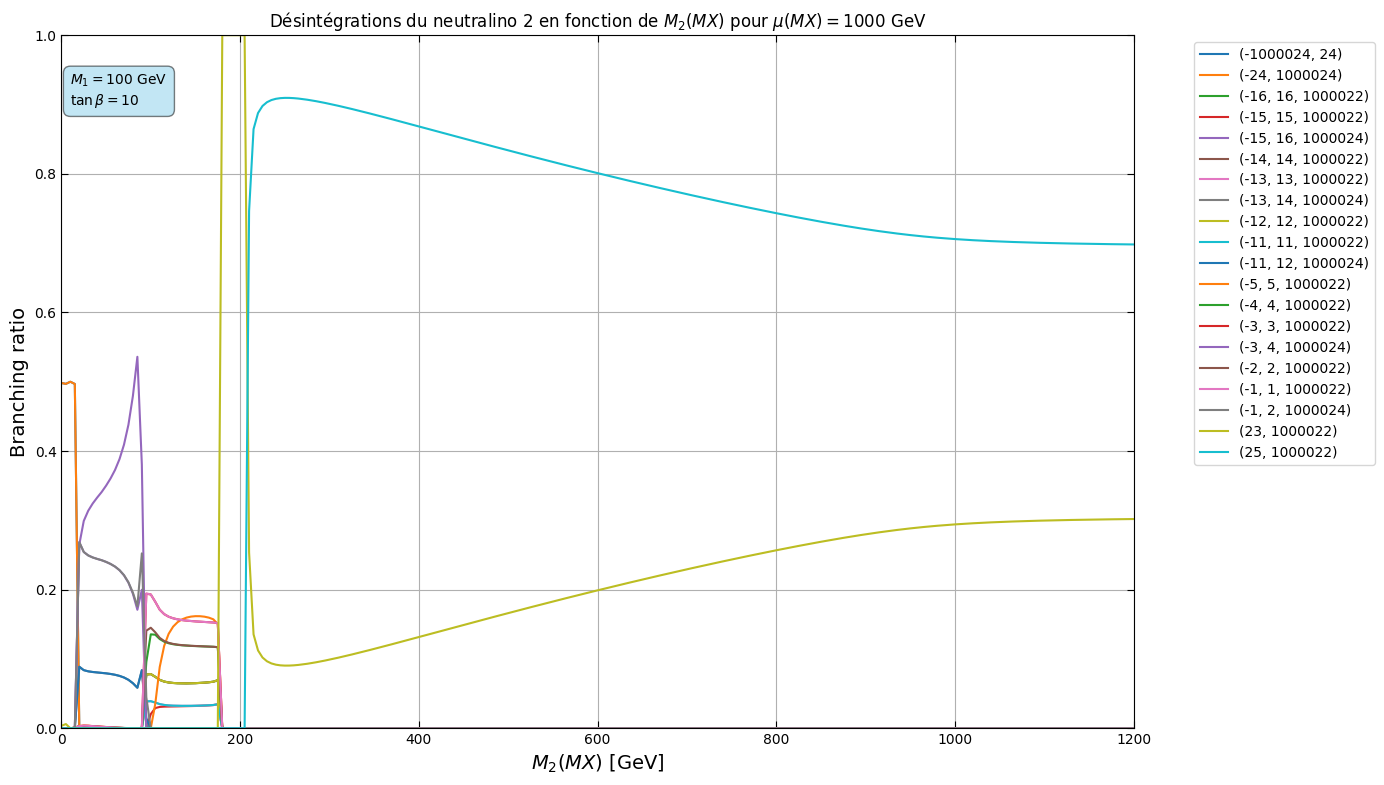

In [77]:
import matplotlib.pyplot as plt

plot(pivot_data_1000, 100, 1000, 10, '', '-')
# # Plotting for mu(MX) = 1000
# plt.figure(figsize=(14, 8))
# for column in pivot_data_1000.columns:
#     plt.plot(pivot_data_1000.index, pivot_data_1000[column], label=column, linestyle='-')

# plt.title('Désintégrations du neutralino 2 en fonction de $M_2(MX)$ pour $\mu(MX) = 1000$')
# plt.xlabel('$M_2(MX)$')
# plt.ylabel('Rapport de branchement')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()
# plt.xlim(0,1200)
# #plt.ylim(0,1200)
# plt.show()

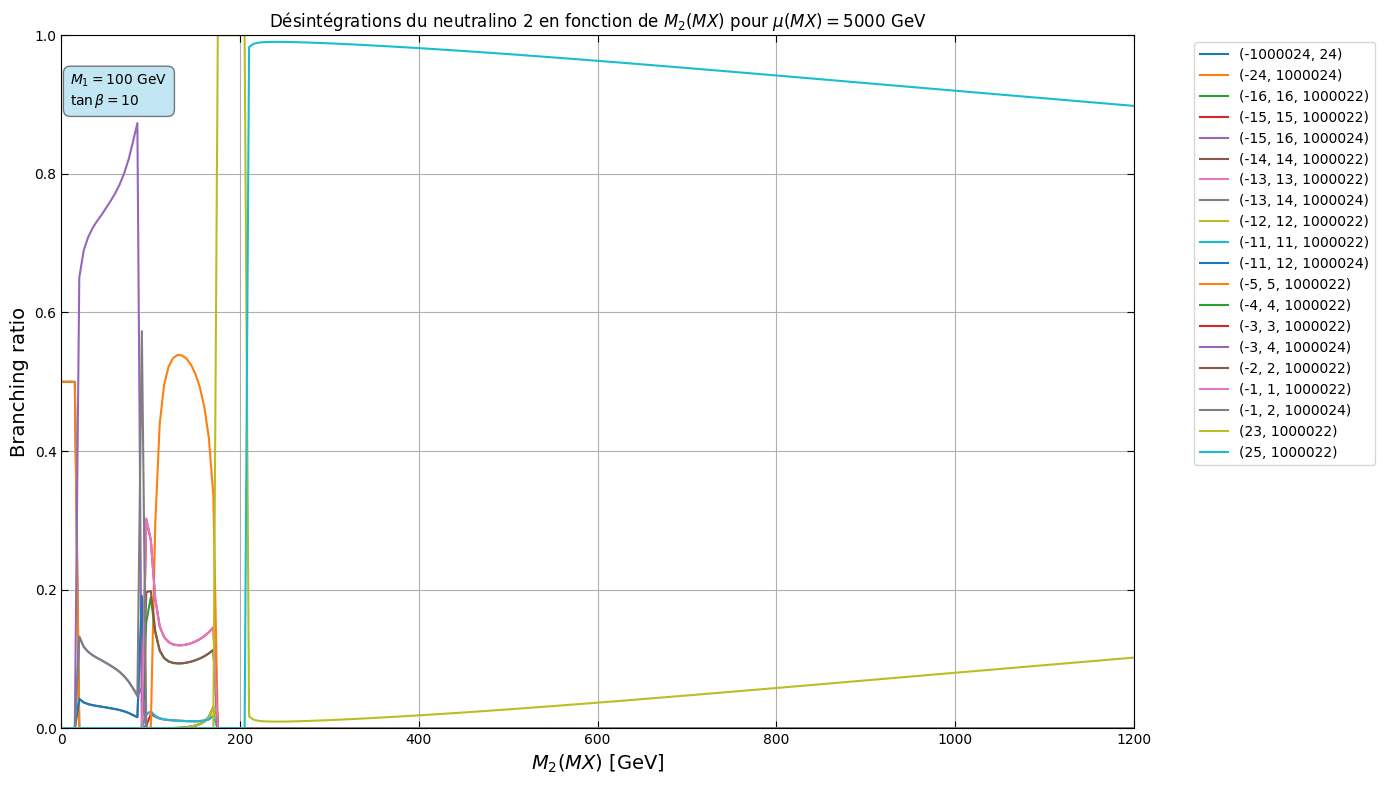

In [78]:
# Plotting for mu(MX) = 5000

plot(pivot_data_5000, 100, 5000, 10, '', '-')
# plt.figure(figsize=(14, 8))
# for column in pivot_data_5000.columns:
#     plt.plot(pivot_data_5000.index, pivot_data_5000[column], label=column, linestyle='-')

# plt.title('Désintégrations du neutralino 2 en fonction de $M_2(MX)$ pour $\mu(MX) = 5000$')
# plt.xlabel('$M_2(MX)$')
# plt.ylabel('Rapport de branchement')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()
# plt.xlim(0,1200)
# #plt.ylim(0,1200)
# plt.show()

In [79]:
# Filter decay products with exactly two particles for mu(MX) = 1000
two_particle_data_1000 = filtered_data_1000[filtered_data_1000['decay_products'].apply(len) == 2]
#print(filtered_data_1000[filtered_data_1000['decay_products'].astype(str).count(',') == 1])
# Group by M_2(MX) and decay_products and sum the branching ratios
grouped_two_particle_1000 = two_particle_data_1000.groupby(['M_2(MX)', 'decay_products']).branching_ratio.sum().reset_index()

# Pivot the data to have decay_products as columns
pivot_two_particle_1000 = grouped_two_particle_1000.pivot(index='M_2(MX)', columns='decay_products', values='branching_ratio')

# Fill NaN values with 0
pivot_two_particle_1000.fillna(0, inplace=True)

pivot_two_particle_1000.head()



decay_products,"(-1000024, 24)","(-24, 1000024)","(23, 1000022)","(25, 1000022)"
M_2(MX),,,,
0.0,0.498191,0.498191,0.003618,0.0
5.0,0.496962,0.496962,0.006076,0.0
10.0,0.500000,0.500000,0.000000,0.0
15.0,0.496775,0.496775,0.000000,0.0
180.0,0.000000,0.000000,1.000000,0.0


In [80]:
# Filter decay products with exactly two particles for mu(MX) = 5000
two_particle_data_5000 = filtered_data_5000[filtered_data_5000['decay_products'].apply(len) == 2]

# Group by M_2(MX) and decay_products and sum the branching ratios
grouped_two_particle_5000 = two_particle_data_5000.groupby(['M_2(MX)', 'decay_products']).branching_ratio.sum().reset_index()

# Pivot the data to have decay_products as columns
pivot_two_particle_5000 = grouped_two_particle_5000.pivot(index='M_2(MX)', columns='decay_products', values='branching_ratio')

# Fill NaN values with 0
pivot_two_particle_5000.fillna(0, inplace=True)

pivot_two_particle_5000.head()


decay_products,"(-1000024, 24)","(-24, 1000024)","(23, 1000022)","(25, 1000022)"
M_2(MX),,,,
0.0,0.499907,0.499907,0.000185,0.0
5.0,0.499850,0.499850,0.000300,0.0
10.0,0.500000,0.500000,0.000000,0.0
15.0,0.499760,0.499760,0.000000,0.0
175.0,0.000000,0.000000,1.000000,0.0


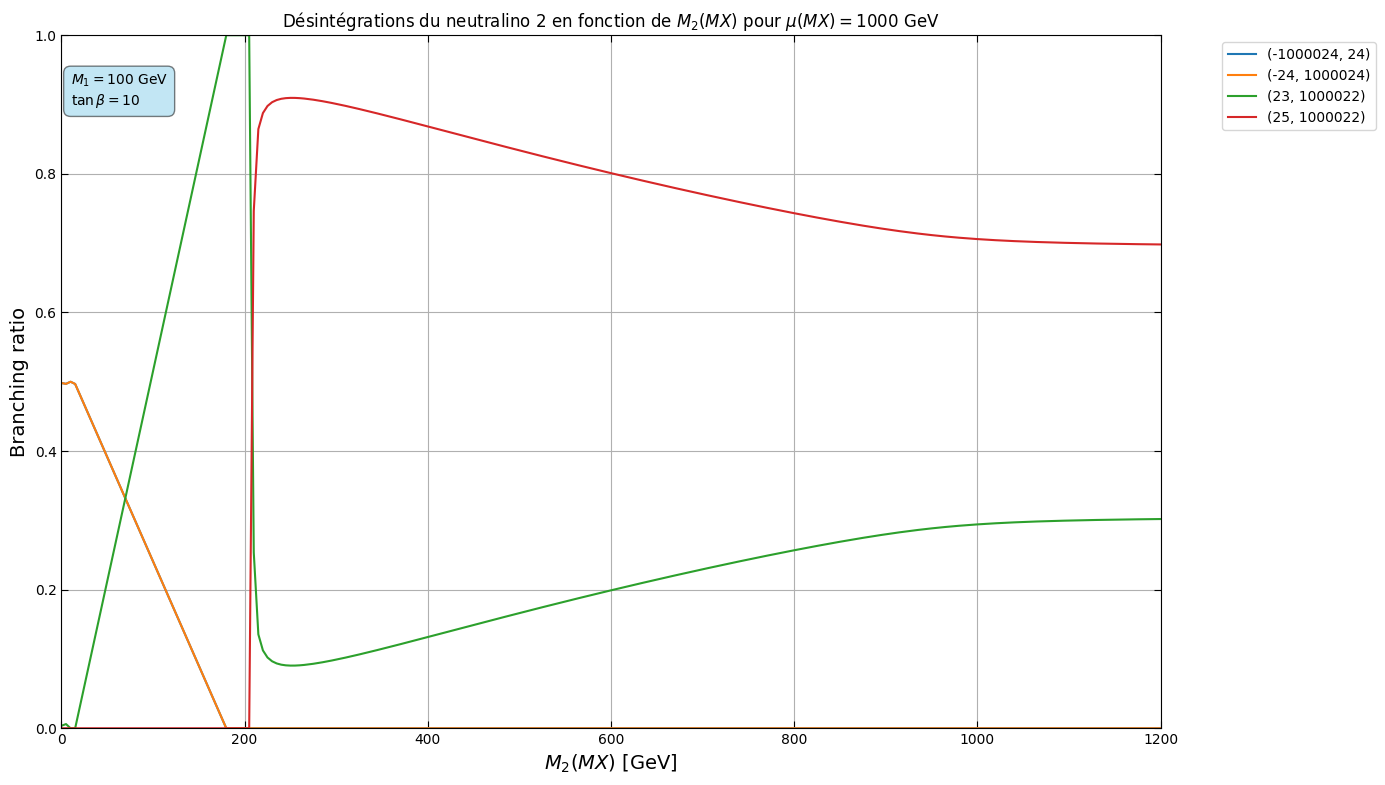

In [81]:
# Plotting for mu(MX) = 1000 with two decay products
plot(pivot_two_particle_1000, 100, 1000, 10, '', '-')
# plt.figure(figsize=(14, 8))
# for column in pivot_two_particle_1000.columns:
#     plt.plot(pivot_two_particle_1000.index, pivot_two_particle_1000[column], label=column, linestyle='-')

# plt.title('Désintégrations du neutralino 2 (2 produits) en fonction de $M_2(MX)$ pour $\mu(MX) = 1000$')
# plt.xlabel('$M_2(MX)$')
# plt.ylabel('Rapport de branchement')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()
# plt.xlim(0,1200)
# #plt.ylim(0,1200)
# plt.show()

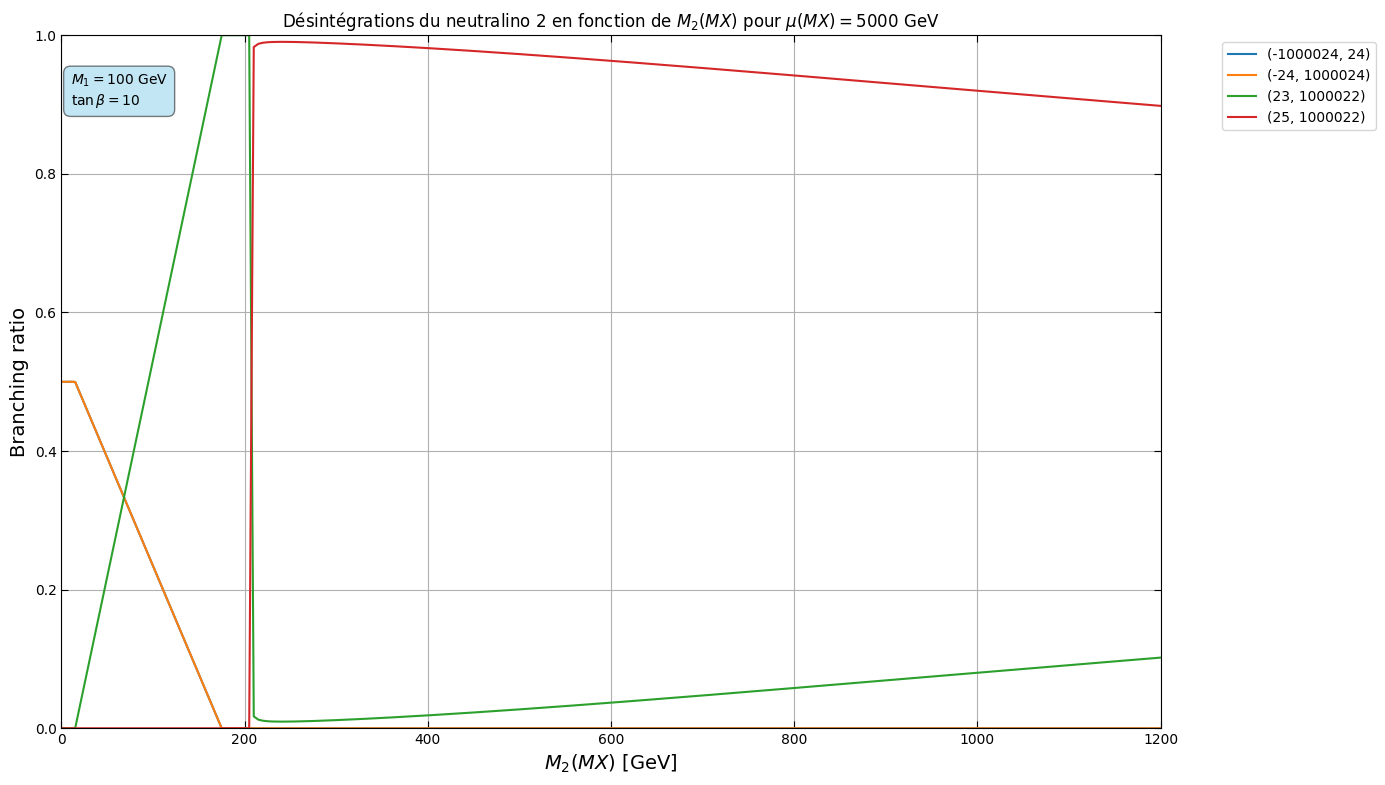

In [82]:
# Plotting for mu(MX) = 5000 with two decay products

plot(pivot_two_particle_5000, 100, 5000, 10, '', '-')
# plt.figure(figsize=(14, 8))
# for column in pivot_two_particle_5000.columns:
#     plt.plot(pivot_two_particle_5000.index, pivot_two_particle_5000[column], label=column, linestyle='-')

# plt.title('Désintégrations du neutralino 2 (2 produits) en fonction de $M_2(MX)$ pour $\mu(MX) = 5000$')
# plt.xlabel('$M_2(MX)$')
# plt.ylabel('Rapport de branchement')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()
# plt.xlim(0,1200)
# #plt.ylim(0,1200)
# plt.show()

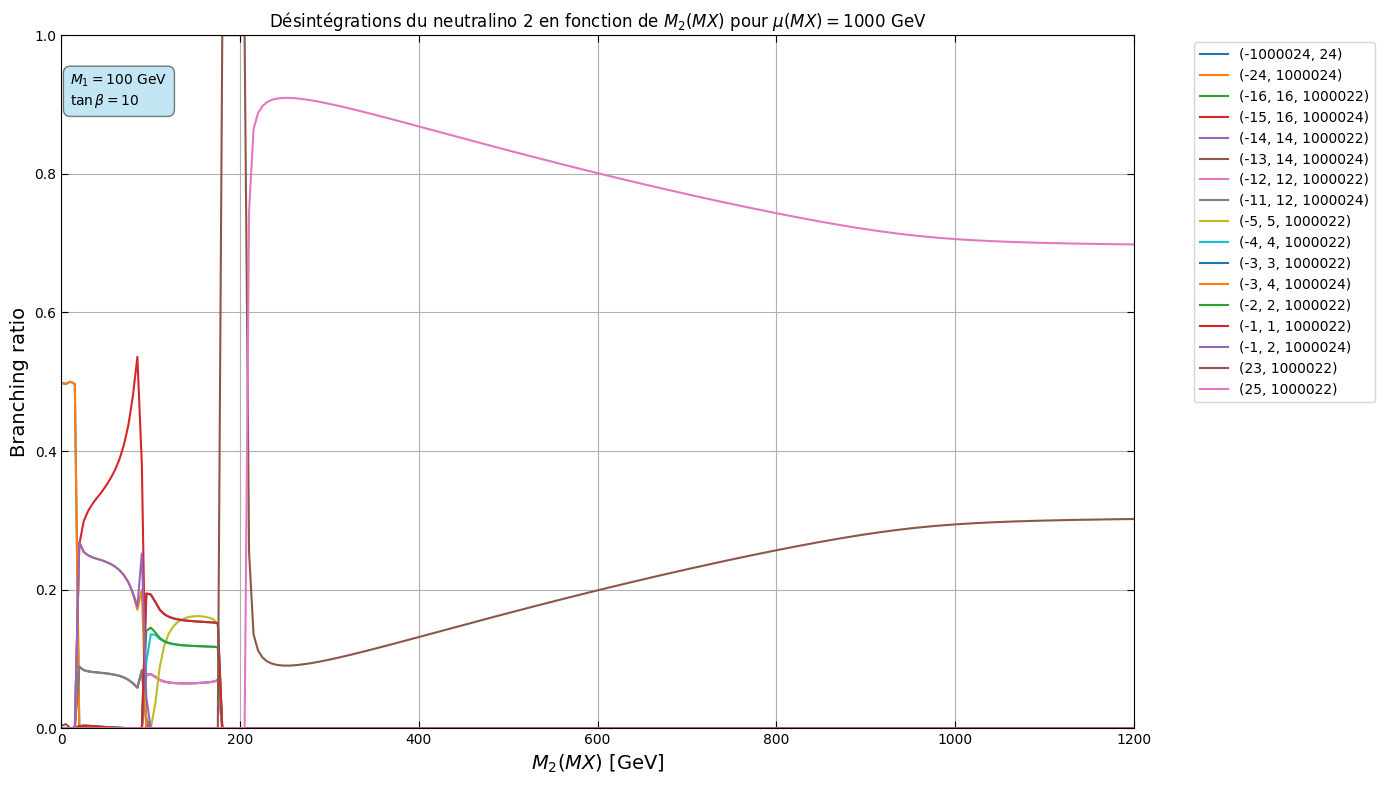

In [83]:
# Filter the columns (decay channels) where the branching ratio is below 0.05 for all M_2 values between 0 and 1200 for mu(MX) = 1000
columns_to_keep_1000 = pivot_data_1000[(pivot_data_1000.index >= 0) & (pivot_data_1000.index <= 1200)].max() >= 0.05
filtered_pivot_1000 = pivot_data_1000[columns_to_keep_1000.index[columns_to_keep_1000]]
plot(filtered_pivot_1000, 100, 1000, 10, '', '-')
# # Plotting for mu(MX) = 1000 with two decay products (using tuple length) and the additional filter
# plt.figure(figsize=(14, 8))
# for column in filtered_pivot_1000.columns:
#     plt.plot(filtered_pivot_1000.index, filtered_pivot_1000[column], label=column, linestyle='-')

# plt.title('Désintégrations du neutralino 2 (2 produits) en fonction de $M_2(MX)$ pour $\mu(MX) = 1000$ (avec filtre)')
# plt.xlabel('$M_2(MX)$')
# plt.ylabel('Rapport de branchement')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()
# plt.xlim(0,1200)
# plt.show()


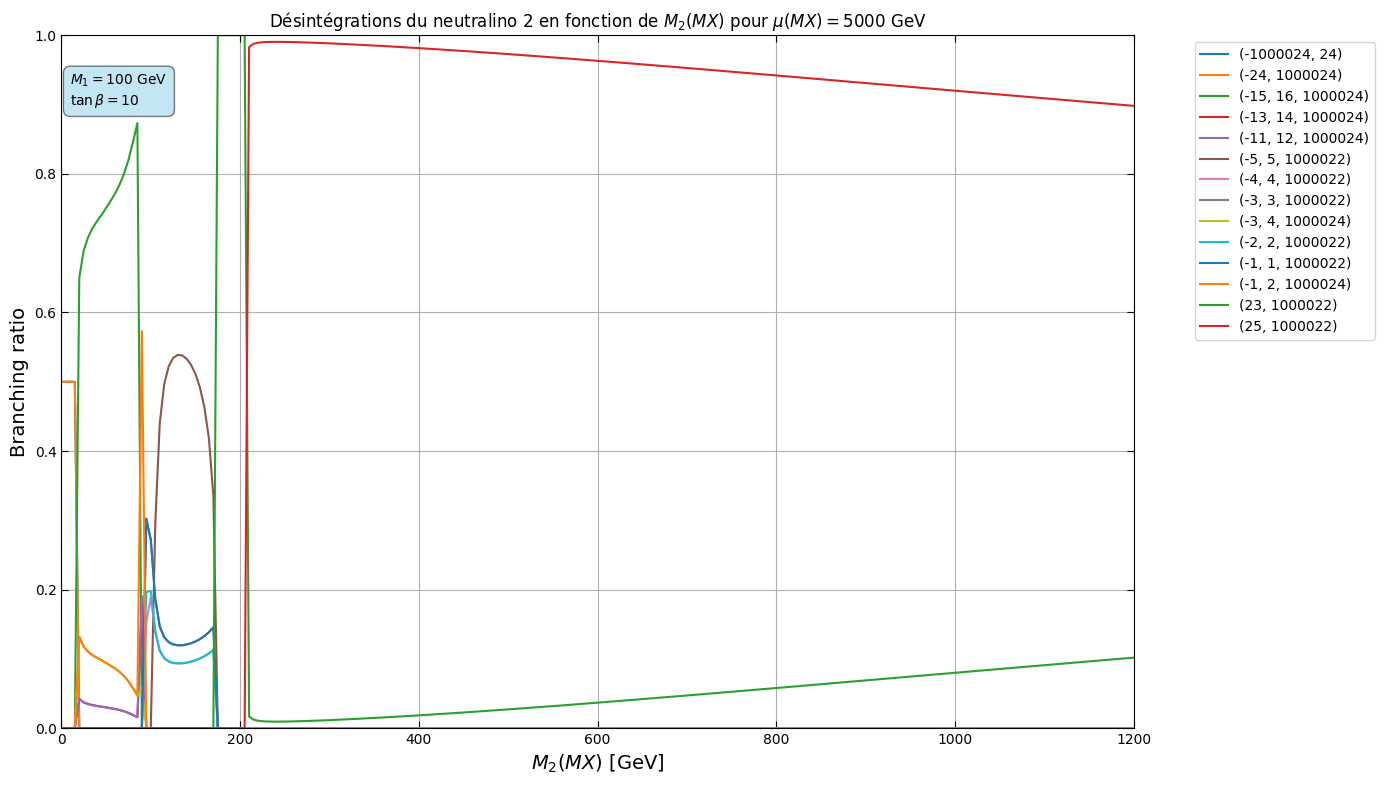

In [84]:
# Filter the columns (decay channels) where the branching ratio is below 0.05 for all M_2 values between 0 and 1200 for mu(MX) = 1000
columns_to_keep_5000 = pivot_data_5000[(pivot_data_5000.index >= 0) & (pivot_data_5000.index <= 1200)].max() >= 0.05
filtered_pivot_5000 = pivot_data_5000[columns_to_keep_5000.index[columns_to_keep_5000]]

plot(filtered_pivot_5000, 100, 5000, 10, '', '-')
# # Plotting for mu(MX) = 1000 with two decay products (using tuple length) and the additional filter
# plt.figure(figsize=(14, 8))
# for column in filtered_pivot_5000.columns:
#     plt.plot(filtered_pivot_5000.index, filtered_pivot_5000[column], label=column, linestyle='-')

# plt.title('Désintégrations du neutralino 2 (2 produits) en fonction de $M_2(MX)$ pour $\mu(MX) = 1000$ (avec filtre)')
# plt.xlabel('$M_2(MX)$')
# plt.ylabel('Rapport de branchement')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()
# plt.xlim(0,1200)
# plt.show()


In [85]:
from particle_name import particles_names

In [86]:
particles_names = particles_names()

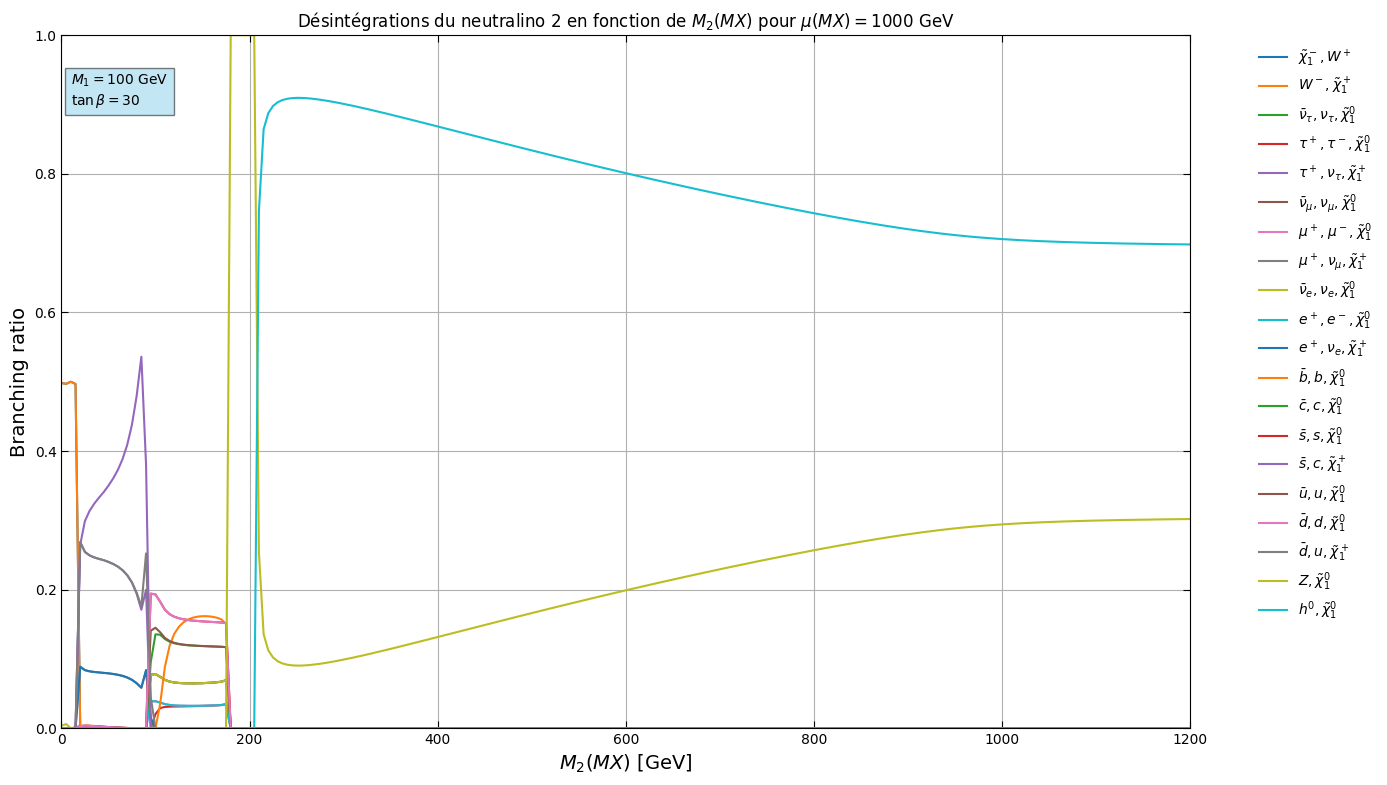

In [87]:
# Convert the column names of pivot_data_1000 for LaTeX display
def latex_decay_products_to_names(decay_tuple_str):
    return tuple(particles_names.get(int(pid.strip()), pid.strip()) for pid in decay_tuple_str.strip('()').split(','))

pivot_data_1000.columns = [latex_decay_products_to_names(str(col)) for col in pivot_data_1000.columns]

# Redefine the plotting function with the column names adjusted
fig = plt.figure(figsize=(14, 8))
for column in pivot_data_1000.columns:
    #plt.plot(pivot_data_1000.index, pivot_data_1000[column], label=f"${column[0]}, {column[1]}$")
    if len(column) == 2:
        plt.plot(pivot_data_1000.index, pivot_data_1000[column], label=f"${column[0]}, {column[1]}$")
    if len(column) == 3:
        plt.plot(pivot_data_1000.index, pivot_data_1000[column], label=f"${column[0]}, {column[1]}, {column[2]}$")

plt.text(10, 0.9, r'$M_1 = 100$ GeV' + '\n' + r'$\tan\beta=30$', fontsize=10, bbox=dict(facecolor='skyblue', alpha=0.5))
plt.title(r'Désintégrations du neutralino 2 en fonction de $M_2(MX)$ pour $\mu(MX) = 1000$ GeV')
plt.xlabel(r'$M_2(MX)$ [GeV]', fontsize=14)
plt.ylabel('Branching ratio', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.grid(True)
plt.tight_layout()
plt.tick_params(which='major', length=5, direction='in', bottom=True, top=True, left=True, right=True)
plt.xlim(0, 1200)
plt.ylim(0, 1)
plt.show()

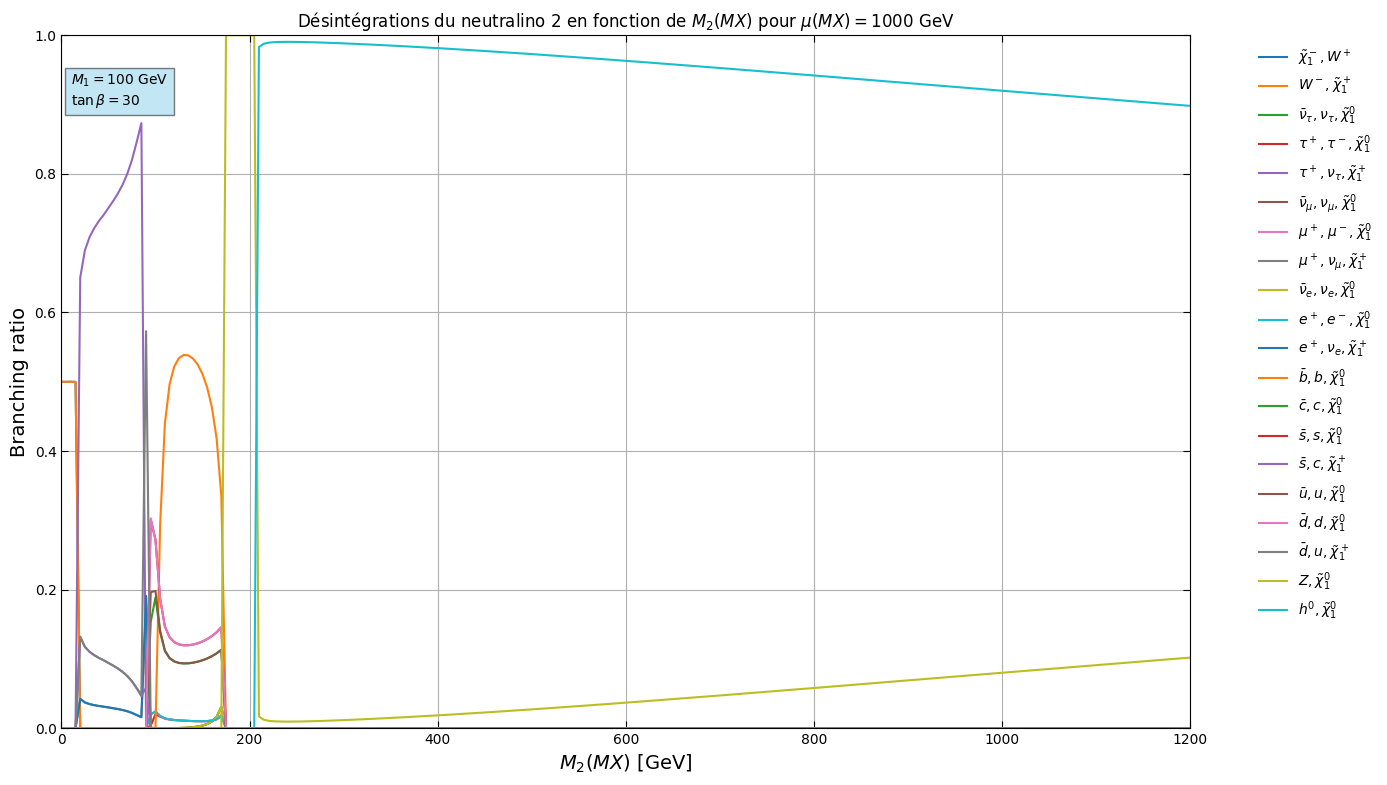

In [88]:
# Convert the column names of pivot_data_1000 for LaTeX display
def latex_decay_products_to_names(decay_tuple_str):
    return tuple(particles_names.get(int(pid.strip()), pid.strip()) for pid in decay_tuple_str.strip('()').split(','))

pivot_data_5000.columns = [latex_decay_products_to_names(str(col)) for col in pivot_data_5000.columns]

# Redefine the plotting function with the column names adjusted
fig = plt.figure(figsize=(14, 8))
for column in pivot_data_5000.columns:

    if len(column) == 2:
        plt.plot(pivot_data_5000.index, pivot_data_5000[column], label=f"${column[0]}, {column[1]}$")
    if len(column) == 3:
        plt.plot(pivot_data_5000.index, pivot_data_5000[column], label=f"${column[0]}, {column[1]}, {column[2]}$")

plt.text(10, 0.9, r'$M_1 = 100$ GeV' + '\n' + r'$\tan\beta=10$', fontsize=10, bbox=dict(facecolor='skyblue', alpha=0.5))
plt.title(r'Désintégrations du neutralino 2 en fonction de $M_2(MX)$ pour $\mu(MX) = 5000$ GeV')
plt.xlabel(r'$M_2(MX)$ [GeV]', fontsize=14)
plt.ylabel('Branching ratio', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.grid(True)
plt.tight_layout()
plt.tick_params(which='major', length=5, direction='in', bottom=True, top=True, left=True, right=True)
plt.xlim(0, 1200)
plt.ylim(0, 1)
plt.show()

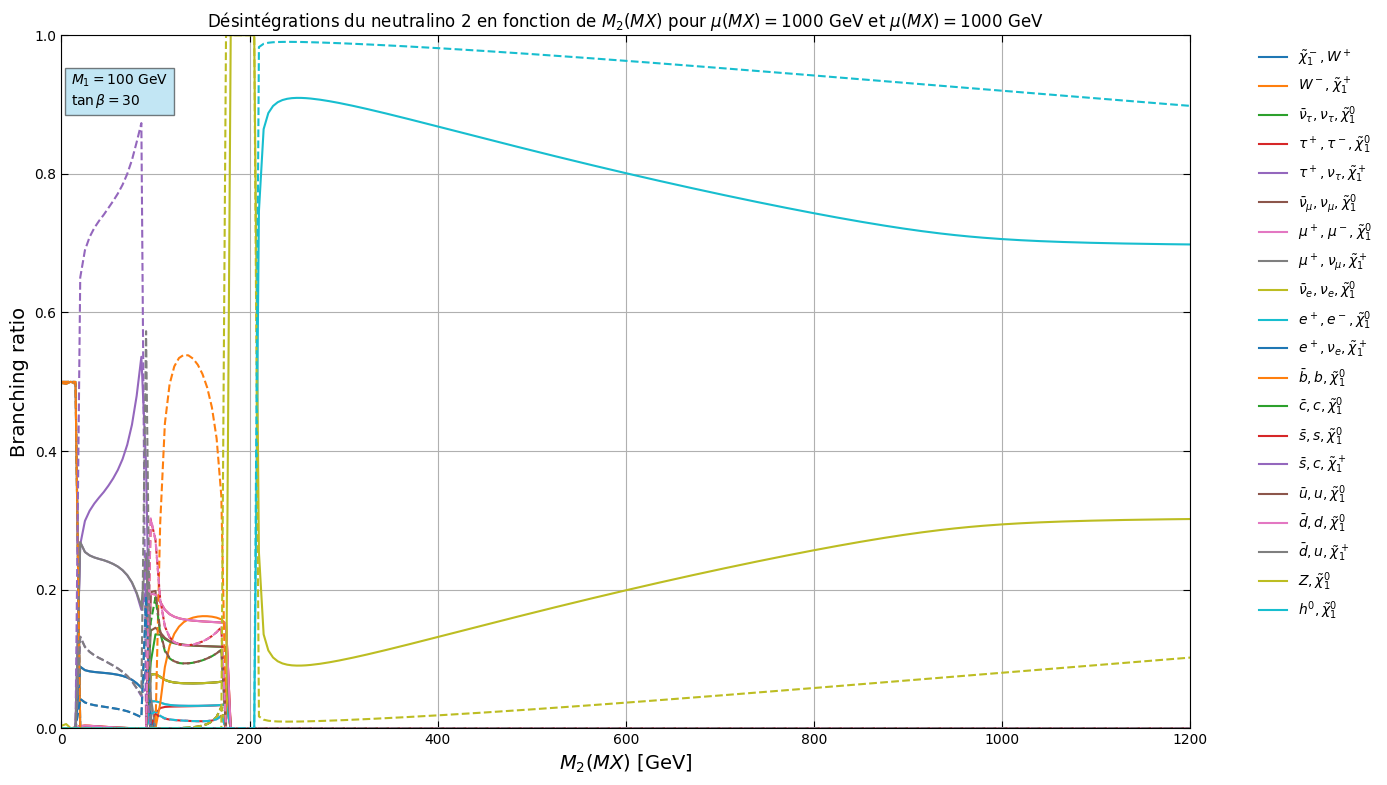

In [6]:
df_desin = slha_folder('M2from0to1200M15000mu1000and5000')

filtered_data_1000 = df_desin[(df_desin['particle_id'] == 1000023) & (df_desin['mu(MX)'] == 1000)]
filtered_data_5000 = df_desin[(df_desin['particle_id'] == 1000023) & (df_desin['mu(MX)'] == 5000)]
#two_particle_data_1000 = filtered_data_1000[filtered_data_1000['decay_products'].apply(len) == 2]
grouped_particle_1000 = filtered_data_1000.groupby(['M_2(MX)', 'decay_products']).branching_ratio.sum().reset_index()
pivot_data_1000 = grouped_particle_1000.pivot(index='M_2(MX)', columns='decay_products', values='branching_ratio')
pivot_data_1000.fillna(0, inplace=True)
#two_particle_data_5000 = filtered_data_5000[filtered_data_5000['decay_products'].apply(len) == 2]
grouped_particle_5000 = filtered_data_5000.groupby(['M_2(MX)', 'decay_products']).branching_ratio.sum().reset_index()
pivot_data_5000 = grouped_particle_5000.pivot(index='M_2(MX)', columns='decay_products', values='branching_ratio')
pivot_data_5000.fillna(0, inplace=True)

from particle_name import particles_names
particles_name = particles_names()

def latex_decay_products_to_names(decay_tuple_str):
    return tuple(particles_name.get(int(pid.strip()), pid.strip()) for pid in decay_tuple_str.strip('()').split(','))

pivot_data_1000.columns = [latex_decay_products_to_names(str(col)) for col in pivot_data_1000.columns]
pivot_data_5000.columns = [latex_decay_products_to_names(str(col)) for col in pivot_data_5000.columns]

fig = plt.figure(figsize=(14, 8))
for column in pivot_data_1000.columns:
    #plt.plot(pivot_data_1000.index, pivot_data_1000[column], label=f"${column[0]}, {column[1]}$")
    if len(column) == 2:
        plt.plot(pivot_data_1000.index, pivot_data_1000[column], label=f"${column[0]}, {column[1]}$")
    if len(column) == 3:
        plt.plot(pivot_data_1000.index, pivot_data_1000[column], label=f"${column[0]}, {column[1]}, {column[2]}$")

plt.text(10, 0.9, r'$M_1 = 100$ GeV' + '\n' + r'$\tan\beta=30$', fontsize=10, bbox=dict(facecolor='skyblue', alpha=0.5))
plt.title(r'Désintégrations du neutralino 2 en fonction de $M_2(MX)$ pour $\mu(MX) = 1000$ GeV et $\mu(MX) = 1000$ GeV')
plt.xlabel(r'$M_2(MX)$ [GeV]', fontsize=14)
plt.ylabel('Branching ratio', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.grid(True)
plt.tight_layout()
plt.tick_params(which='major', length=5, direction='in', bottom=True, top=True, left=True, right=True)
plt.xlim(0, 1200)
plt.ylim(0, 1)

for column in pivot_data_5000.columns:

    if len(column) == 2:
        plt.plot(pivot_data_5000.index, pivot_data_5000[column], label=f"${column[0]}, {column[1]}$", linestyle='--')
    if len(column) == 3:
        plt.plot(pivot_data_5000.index, pivot_data_5000[column], label=f"${column[0]}, {column[1]}, {column[2]}$", linestyle='--')


plt.show()